# レッスン1：機械学習の基礎

このセクションでは、機械学習の基本的な概念とPythonでの実装について学びます。具体的には、以下のトピックをカバーします:

- 教師あり学習（回帰と分類）
- 教師なし学習（クラスタリングと次元削減）
- モデルの評価と選択



## 教師あり学習

教師あり学習は、機械学習の一種で、モデルがラベル付きのトレーニングデータから学習する方法です。教師あり学習は主に2つのタイプ、回帰と分類に分けられます。

- **回帰**: 出力が連続値（例えば、家の価格や気温など）である予測問題。
- **分類**: 出力が離散値（例えば、スパムメールか否か、犬の品種など）である予測問題。

### 回帰

回帰は、出力が連続値である予測問題を解くための手法です。例えば、家の広さ、築年数、地域などの情報から家の価格を予測する問題は回帰問題となります。

ここでは、最も基本的な回帰手法である線形回帰を紹介します。線形回帰は、特徴量とターゲットとの間の線形関係を仮定し、その関係性を学習します。

Model accuracy: 87.48%


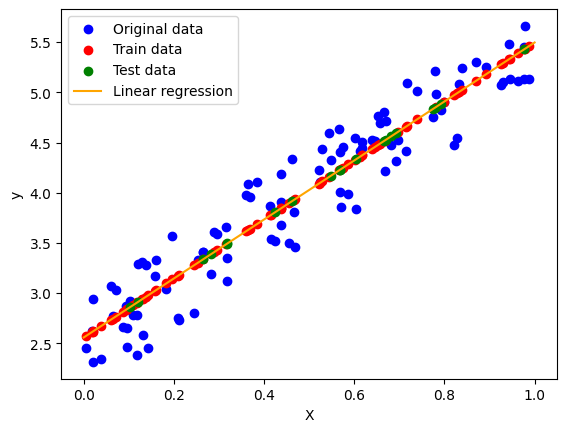

In [2]:
# 必要なライブラリのインポート
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 乱数の種を固定
np.random.seed(0)

# データの作成
X = np.random.rand(100, 1)
y = 2 + 3 * X + np.random.rand(100, 1)

# データの分割（訓練データとテストデータ）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# モデルの訓練（線形モデルを利用）
model = LinearRegression()
model.fit(X_train, y_train)

# モデルの評価
score = model.score(X_test, y_test)
print(f'Model accuracy: {score * 100:.2f}%')

# データの視覚化

# 学習データとテストデータについて予測を実行
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 元のデータを表示
plt.scatter(X, y, color='blue', label='Original data')

# トレーニングデータに対する予測値を表示
plt.scatter(X_train, y_train_pred, color='red', label='Train data')

# テストデータに対する予測値を表示
plt.scatter(X_test, y_test_pred, color='green', label='Test data')

# 回帰直線を表示
x_line = np.linspace(0, 1, 100).reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color='orange', label='Linear regression')

# 凡例
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('y')

plt.show()


ここでは例として、特徴量に対する直線的な関係（y = 2 + 3X）にノイズ（乱数）を加えたものを用意し、モデルに学習させています。上の図は元のデータ、訓練データ、モデルによる予測値、線形回帰モデルの回帰直線を表示したものです。

- 青色(`color='blue'`)の点は元のデータを示しています。これは線形回帰モデルのトレーニングとテストに使用されたデータです。ある直線に沿って幅を持った（ノイズを加えた）データであることが分かります。

- 赤色(`color='red'`)の点は訓練データに対する予測値を示しています。これらは線形回帰モデルが訓練データに基づいて生成した予測値です。

- 緑色(`color='green'`)の点はテストデータに対する予測値を示しています。これらは線形回帰モデルがテストデータに基づいて生成した予測値です。

- オレンジ色(`color='orange'`)の線は線形回帰モデルによる予測線（回帰直線）を示しています。この線はモデルが学習した線形関係を表現しています。

### 分類

分類は、出力が離散値である予測問題を解くための手法です。例えば、メールがスパムか否かを予測する問題は分類問題となります。

ここでは、最も基本的な分類手法であるロジスティック回帰を紹介します。ロジスティック回帰は、特徴量とターゲットとの間のロジスティック関数（シグモイド関数）を仮定し、その関係性を学習します。

In [ ]:
# ロジスティック回帰の例

# 必要なライブラリのインポート
from sklearn.linear_model import LogisticRegression

# データの作成
X = np.random.rand(100, 1)
y = (X > 0.5).astype(int)[:,0]

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# モデルの訓練
model = LogisticRegression()
model.fit(X_train, y_train)

# モデルの評価
score = model.score(X_test, y_test)
print(f'Model accuracy: {score * 100:.2f}%')

Model accuracy: 95.00%


上記のコードは、ロジスティック回帰モデルを訓練し、その精度を評価する一連の流れを示しています。

まず、予測を行いたいデータを読み込みます。ここでは例として、`numpy`の`random.rand`関数を使用して、0から1の間の乱数を持つ100行1列の行列（ここでは特徴量と呼ばれる）を作成しています。次に、作成した特徴量Xが0.5より大きい場合は1、それ以外は0となるようなラベルyを生成します。これは2値分類の例で、yは真のラベルまたは目標変数と呼ばれます。

データが用意出来たら、`train_test_split`関数を使用してデータを訓練用とテスト用に分割します。ここでは全体の20%がテスト用データとなるように設定しています。その後、モデルを訓練しテスト用データで評価をして精度を表示しています。

このように、教師あり学習では、ラベル付きのデータを用いてモデルを訓練し、未知のデータに対する予測性能を評価します。

## 教師なし学習

教師なし学習は、ラベルなしのデータから有用な情報を抽出するための手法です。教師なし学習は主に2つのタイプ、クラスタリングと次元削減に分けられます。

- **クラスタリング**: データを自然なグループに分ける。例えば、顧客セグメンテーションや異常検出など。
- **次元削減**: データの次元（特徴量の数）を減らす。例えば、可視化やノイズ除去、特徴抽出など。

### クラスタリング

クラスタリングは、データを自然なグループに分ける手法です。クラスタリングは、顧客セグメンテーション、異常検出、画像セグメンテーションなど、様々なアプリケーションで使用されます。

ここでは、最も基本的なクラスタリング手法であるK-meansクラスタリングを紹介します。K-meansは、データをK個のクラスタに分ける手法で、各クラスタはその中心（セントロイド）に最も近いデータポイントを含みます。

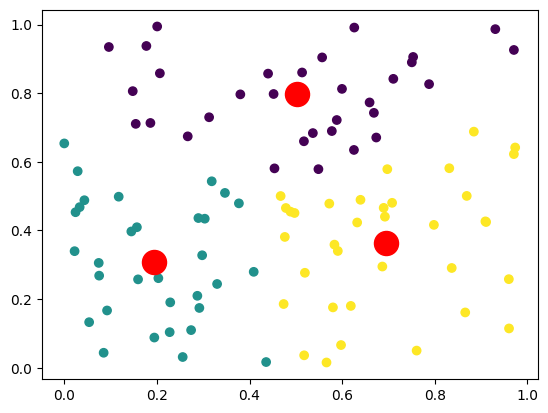

In [ ]:
# K-meansクラスタリングの例

# 必要なライブラリのインポート
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# データの作成
X = np.random.rand(100, 2)

# モデルの訓練
model = KMeans(n_clusters=3, n_init=10)
model.fit(X)

# クラスタの予測
y_pred = model.predict(X)

# クラスタの表示
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

#クラスター中心（セントロイド）を赤い点で表示
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='red')
plt.show()

上記のコードは、K-meansクラスタリングを用いてデータを3つのクラスタに分ける一連の流れを示しています。このように、教師なし学習では、ラベルなしのデータから有用な情報を抽出します。

### 次元削減

次元削減は、データの次元（特徴量の数）を減らす手法です。次元削減は、データの可視化、ノイズ除去、特徴抽出など、様々なアプリケーションで使用されます。

ここでは、最も基本的な次元削減手法である主成分分析（PCA）を紹介します。PCAは、データの分散を最大化する新しい特徴量（主成分）を見つけ出す手法です。

以下にIrisデータセットにPCAを適用した例を示します。Irisデータセットは、4つの特徴（がくの長さ、がくの幅、花びらの長さ、花びらの幅）、すなわち4次元のデータを持つ150のサンプルから成ります。

まず、データを表形式で表示してみます。

In [ ]:
# 必要なライブラリをインポート
import pandas as pd
from sklearn.datasets import load_iris

# Irisデータセットを読み込む
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# DataFrameに変換
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['target'] = df['target'].map(dict(zip(range(3), target_names)))

# データの表示
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


次に、4次元のデータを次元削減によって2次元にし、結果を散布図で表示します。

In [ ]:
# グラフの軸に日本語を使うために必要な処理
!pip install japanize-matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 99.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=9102ea2140b6c0d63cce1284153584421b411c21ae7505e696d31b386c2c60b5
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


元の形: (150, 4)
削減後の形: (150, 2)
説明した分散の割合: [0.92461872 0.05306648]


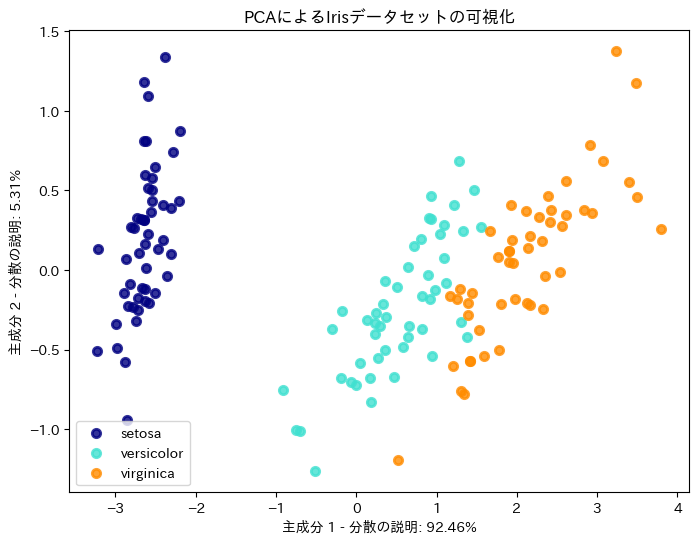

In [ ]:

# 必要なライブラリをインポート
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import japanize_matplotlib
import matplotlib.pyplot as plt

# Irisデータセットを読み込む
data = load_iris()
X = data.data
y = data.target
target_names = data.target_names

# 保持したい成分の数を指定
n_components = 2

# PCAモデルの初期化とフィット
model = PCA(n_components=n_components)
X_reduced = model.fit_transform(X)

# 元の形と削減後の形を出力
print(f'元のデータの形状（サンプル数X次元）: {X.shape}')
print(f'削減後のデータの形状（サンプル数X次元）: {X_reduced.shape}')

# 各成分の寄与率を表示
print(f'各主成分の寄与率（各主成分で説明される分散の割合）: {model.explained_variance_ratio_}')

# データの可視化
plt.figure(figsize=(8, 6))

colors = ['navy', 'turquoise', 'darkorange']
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], color=color, alpha=.8, lw=2, label=target_name)

plt.title('PCAによるIrisデータセットの可視化')
plt.xlabel(f'主成分1による寄与率: {model.explained_variance_ratio_[0]*100:.2f}%')
plt.ylabel(f'主成分2による寄与率: {model.explained_variance_ratio_[1]*100:.2f}%')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()


このスクリプトでは、PCAを使用して4次元のIrisデータセットを2次元に削減し、結果を色分けして可視化しています。色分けは各データ点がどのIrisの品種に対応しているかを示しています。